# Support Vector Regression (SVR)

Author: Chaitanya Laxman

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [16]:
dataset = pd.read_csv("Position_Salaries.csv")
X = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

In [17]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [22]:
y = y.reshape(len(y),1)  # Because StandardSScalar class expects 2d array

In [23]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

In [25]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss1 = StandardScaler()
X = ss.fit_transform(X)
y = ss1.fit_transform(y)

## Training the SVR model on the whole dataset

In [26]:
from sklearn.svm import SVR
regressor = SVR(kernel = "rbf")
regressor.fit(X, y)

C:\Users\THANOFT\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

## Predicting a new result

In [33]:
# To predict the salary for level = 6.5
# Transformation is required (ss.transformation([[6.5]])), because we standardized 'X'.
# To get thee predicted value without standardization we use ss1.inverse_transform
ss1.inverse_transform(regressor.predict(ss.transform([[6.5]])))

array([170370.0204065])

## Visualising the SVR results

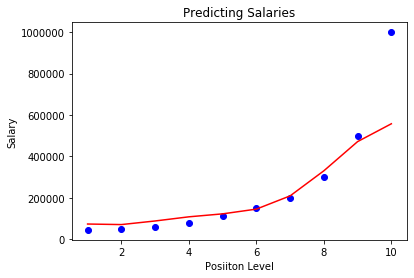

In [34]:
plt.scatter(ss.inverse_transform(X), ss1.inverse_transform(y), color = "blue")
plt.plot(ss.inverse_transform(X), ss1.inverse_transform(regressor.predict(X)), color = "red")
plt.title("Predicting Salaries")
plt.xlabel("Posiiton Level")
plt.ylabel("Salary")
plt.show()